### 39. Methodenseminar
## Big Data Module II: Introduction to Social Network Science with Python
# 3.1 Small-World Networks (Exercise)
**Author**: <a href='https://www.gesis.org/person/haiko.lietz'>Haiko Lietz</a>, GESIS - Leibniz Institute for the Social Sciences

**Date**: 17 July 2019

**Library versions**: ``networkx`` 2.2 ([documentation](https://networkx.github.io/documentation/))

***

## The SNS Dataset
<img src='images/model_sns.png'>
Study this dataset using your own research questions or work through the exercises.

## Exercise 1
In the demo, in section 3.1.3.2, we studied the dynamics of the time-sliced co-authorship graph.
#### How do results change if time increases cumulatively?
That means the second time slice consists of the first two, the third of the first three, and so on. Think about a simple fix of the code to achieve this and use this fix to revisit that part of the demo and produce according results.

In [1]:
import pandas as pd

In [2]:
authorships = pd.read_csv('../data/sns/authorships.txt', header='infer', delimiter='\t', encoding='utf-8')
publications = pd.read_csv('../data/sns/publications.txt', header='infer', delimiter='\t', encoding='utf-8')
authorships = pd.merge(left=authorships, right=publications[['publication_id', 'time']], on='publication_id')
authorships['publication_id'] = authorships['publication_id'].astype('str')
authorships.head()

,publication_id,author_id,time
0,0,0,1916
1,1,1,1925
2,2,2,1927
3,2,3,1927
4,3,4,1936


In [3]:
years_aut = list(authorships['time'].drop_duplicates())
years_aut[:13]

[1916, 1925, 1927, 1936, 1937, 1938, 1943, 1945, 1946, 1948, 1949, 1950, 1951]

In [4]:
import networkx as nx
from networkx.algorithms import bipartite

In [5]:
L_C = []
for year in years_aut:
    df = authorships[authorships['time'] <= year][['publication_id', 'author_id']] # fix here
    A = nx.Graph()
    A.add_edges_from(df.values)
    L_C.append(bipartite.weighted_projected_graph(A, set(df['author_id'])))

#### Largest Connected Component

In [6]:
def lcc(G):
    return max(nx.connected_component_subgraphs(G, copy=True), key=len)

In [7]:
L_n = []
L_m = []
L_n_lcc = []
L_m_lcc = []
for i in range(0, len(L_C)):
    L_n.append(L_C[i].number_of_nodes())
    L_m.append(L_C[i].number_of_edges())
    L_n_lcc.append(lcc(L_C[i]).number_of_nodes())
    L_m_lcc.append(lcc(L_C[i]).number_of_edges())

In [8]:
import matplotlib.pyplot as plt
import numpy as np

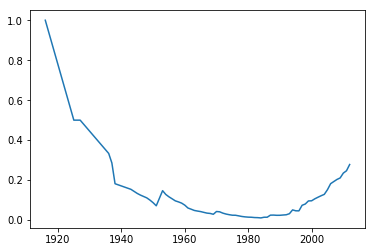

In [9]:
plt.plot(years_aut, np.array(L_n_lcc)/np.array(L_n))

#### Small-Worldliness

In [10]:
L_c = []
#L_l = []
for i in range(0, len(L_C)):
    L_c.append(nx.average_clustering(lcc(L_C[i])))
#    L_l.append(nx.average_shortest_path_length(lcc(L_C[i])))
L_l = [0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.4285714285714286, 1.4285714285714286, 1.4285714285714286, 1.4285714285714286, 1.4285714285714286, 1.4285714285714286, 1.5277777777777777, 1.5277777777777777, 1.5277777777777777, 1.5277777777777777, 1.5277777777777777, 1.6222222222222222, 1.6222222222222222, 1.290909090909091, 1.290909090909091, 1.6470588235294117, 1.760233918128655, 4.63063063063063, 3.978048780487805, 3.743078626799557, 3.9064625850340136, 4.385739333722969, 4.75533199195171, 4.525343642611684, 5.138423339540658, 5.157875980042766, 5.236245954692556, 8.173587512087305, 8.75389619189592, 9.479152918591398, 9.088970177003189, 9.532223723128066, 10.485910962429234, 11.288213242544325, 11.422435483674539, 11.901499036977091, 12.986000077966354, 11.058176130337168, 11.224170495381424, 10.22423595085363, 10.6332019960302, 9.953112627924629, 9.811953179249574]

In [11]:
def sw_random(G, iter=10):
    L_c = []
    L_l = []
    if iter > 0:
        for i in range(0, iter):
            G_rnd = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
            L_c.append(nx.average_clustering(lcc(G_rnd)))
            L_l.append(nx.average_shortest_path_length(lcc(G_rnd)))
        c_r = np.mean(L_c)
        l_r = np.mean(L_l)
    else:
        c_r = nx.density(G)
        l_r = np.log(G.number_of_nodes())
    return c_r, l_r

In [12]:
L_c_r = []
L_l_r = []
for i in range(0, len(L_C)):
    c_r, l_r = sw_random(lcc(L_C[i]), iter=0)
    L_c_r.append(c_r)
    L_l_r.append(l_r)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


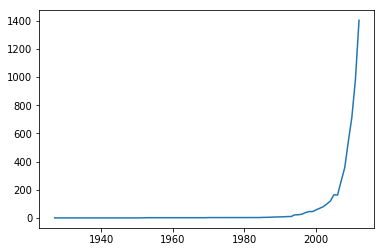

In [13]:
plt.plot(years_aut, (np.array(L_c)/np.array(L_c_r))/(np.array(L_l)/np.array(L_l_r)))

## Exercise 2
In the demo, we saw that the co-authorship graph exhibits increasing returns to scale over time.
#### Does the directed citation graph also densify over time?

In [14]:
citations = pd.read_csv('../data/sns/citations.txt', header='infer', delimiter='\t', encoding='utf-8')
citations.dropna(inplace=True)
citations['publication_id_cited'] = citations['publication_id_cited'].astype(int)
citations.drop('reference_id', inplace=True, axis=1)

In [15]:
citations = pd.merge(left=citations, right=publications[['publication_id', 'time']], on='publication_id')
citations.head()

,publication_id,publication_id_cited,time
0,19,15,1950
1,23,20,1951
2,29,18,1954
3,31,22,1954
4,32,27,1955


In [16]:
years_cit = list(citations['time'].drop_duplicates())
years_cit[:13]

[1950, 1951, 1954, 1955, 1956, 1957, 1960, 1961, 1962, 1964, 1965, 1966, 1967]

In [17]:
L_D = []
for year in years_cit:
    df = citations[citations['time'] == year][['publication_id', 'publication_id_cited']]
    A = nx.Graph()
    A.add_edges_from(df.values)
    L_D.append(A)

In [18]:
L_n = []
L_m = []
L_n_lcc = []
L_m_lcc = []
for i in range(0, len(L_D)):
    L_n.append(L_D[i].number_of_nodes())
    L_m.append(L_D[i].number_of_edges())
    L_n_lcc.append(lcc(L_D[i]).number_of_nodes())
    L_m_lcc.append(lcc(L_D[i]).number_of_edges())

#### Graph Densification

In [19]:
densification = pd.DataFrame({'year': years_cit, 'nodes': L_n, 'edges': L_m})

In [20]:
densification = densification[densification['edges'] > 0]

In [21]:
from sklearn.decomposition import PCA

In [22]:
A_densification = np.column_stack((densification['nodes'], densification['edges']))

In [23]:
A_densification_log10 = np.log10(A_densification)
pca = PCA(n_components = 2)
pca.fit(A_densification_log10)
beta = pca.components_[0, 1]/pca.components_[0, 0]
d = 10**(pca.mean_[1]-pca.mean_[0]*beta)

In [24]:
beta

1.1902853175244859

In [25]:
xfit = np.arange(1, max(A_densification[:, 0]))
yfit = d*xfit**beta

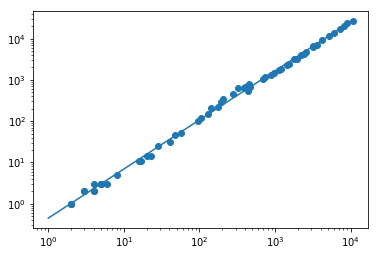

In [26]:
plt.scatter(densification['nodes'], densification['edges'])
plt.plot(xfit, yfit)
plt.xscale('log')
plt.yscale('log')